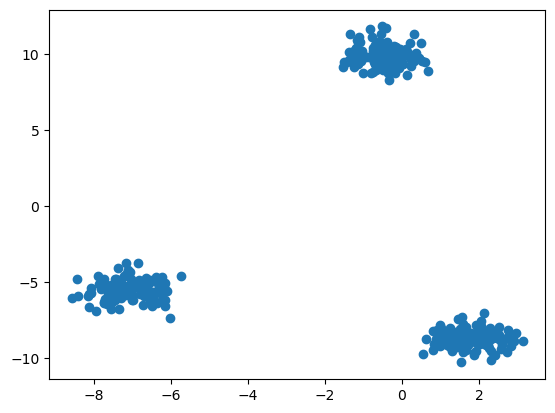

In [1]:
# creating synthetic data
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=0.60) # 3 cluster , 400 points , from each center SD should be 0.6
plt.scatter(X[:, 0], X[:, 1]); # 1D, 2-Dimension

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
labels = kmeans.predict(X)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


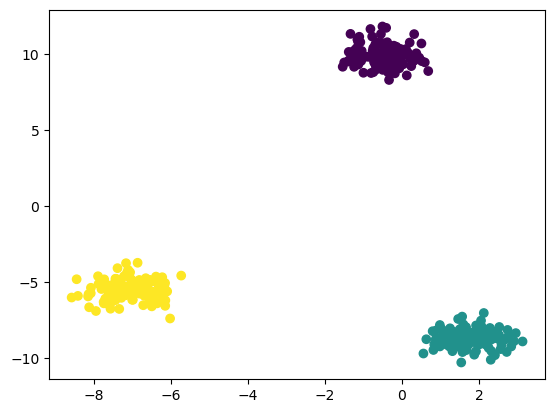

In [3]:
plt.scatter(X[:,0],X[:,1],c=labels)

In [4]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 9):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

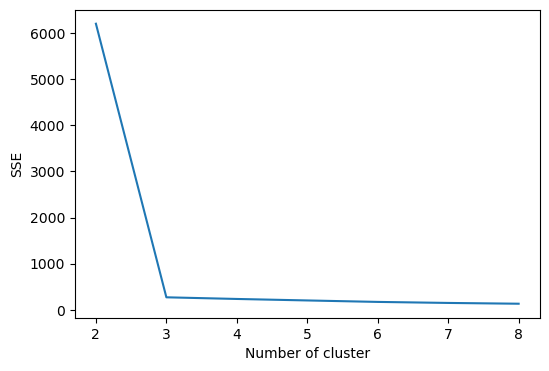

In [5]:
#Elbow Method
plt.figure(figsize=(6,4))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

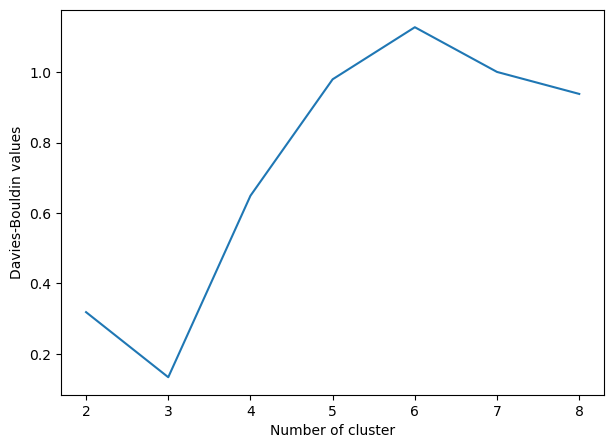

In [6]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [7]:
#Accuracy metrics:
# Calculate Homogeneity score:
from sklearn.metrics import homogeneity_score
A=homogeneity_score(y_true, labels)
print(A)

1.0000000000000002


In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

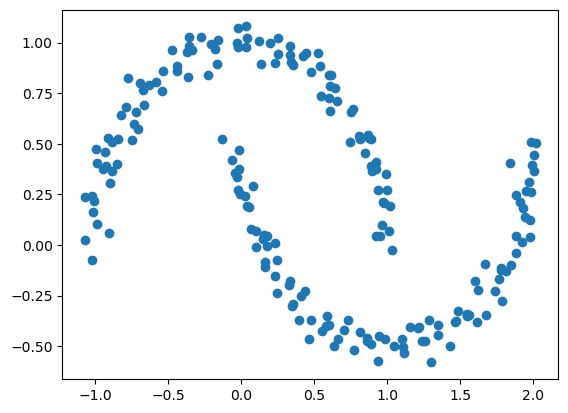

In [9]:
plt.scatter(X[:, 0], X[:, 1]);